In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('key_stats.csv')


In [9]:
df.head()


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [10]:
df.describe()

,minutes_played,match_played,goals,assists
count,747.00000,747.000000,747.000000,747.000000
mean,331.61178,5.089692,0.492637,0.376171
std,248.37193,2.721425,1.313321,0.845502
min,1.00000,1.000000,0.000000,0.000000
25%,116.00000,3.000000,0.000000,0.000000
50%,301.00000,5.000000,0.000000,0.000000
75%,492.00000,7.000000,0.000000,0.000000
max,1230.00000,13.000000,15.000000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


In [6]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
742    False
743    False
744    False
745    False
746    False
Length: 747, dtype: bool

In [13]:
df.isna().sum()

player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64

In [16]:
#creating new columns
df['Minspermatch'] = (df['minutes_played']/df['match_played']).astype(int)
df['Goalspermatch'] = (df['goals']/df['match_played']).astype(int)
df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,Minspermatch,Goalspermatch
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,94,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,92,0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,92,1
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,82,0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,89,0


In [17]:
#finding total goals of the tourments
Total_goals = df['goals'].sum()
print(Total_goals)

368


In [18]:
# the positions of the players in tournament
df['position'].unique()

array(['Goalkeeper', 'Forward', 'Midfielder', 'Defender'], dtype=object)

In [19]:
#we can find the number of midfielders through the following 
df[df['position'] == 'Midfielder']

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,Minspermatch,Goalspermatch
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,82,0
7,Casemiro,Real Madrid,Midfielder,914,11,0,0,107.6,83,0
8,Kroos,Real Madrid,Midfielder,902,12,2,0,116.5,75,0
10,Valverde,Real Madrid,Midfielder,804,11,0,1,96.7,73,0
13,Lucas Vázquez,Real Madrid,Midfielder,349,8,0,1,47.4,43,0
...,...,...,...,...,...,...,...,...,...,...
733,Maier,Young Boys,Midfielder,3,1,0,0,1.3,3,0
738,Savage,Man. United,Midfielder,1,1,0,0,1,1,0
739,Iqbal,Man. United,Midfielder,1,1,0,0,1,1,0
741,Miretti,Juventus,Midfielder,1,1,0,0,0.8,1,0


In [20]:
#players from different clubs
np.size((df['club'].unique()))

32

<Axes: >

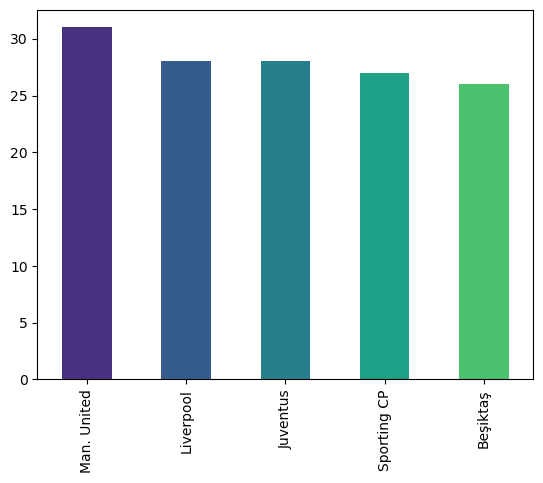

In [24]:
#clubs with maximum players
df['club'].value_counts().nlargest(5).plot(kind = 'bar' , color = sns.color_palette("viridis"))

<Axes: >

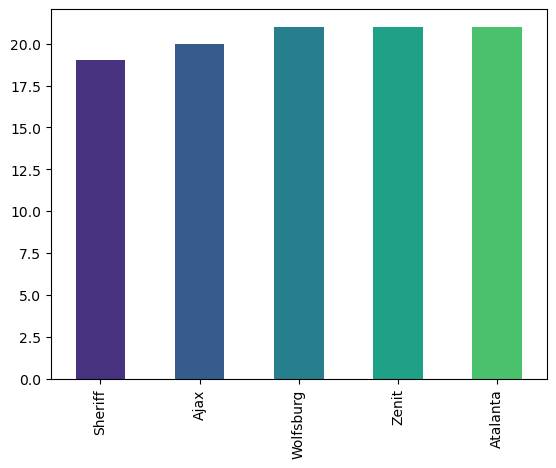

In [25]:
#clubs with minimum players teams 
df['club'].value_counts().nsmallest(5).plot(kind = 'bar' , color = sns.color_palette("viridis"))

<Axes: xlabel='assists', ylabel='match_played'>

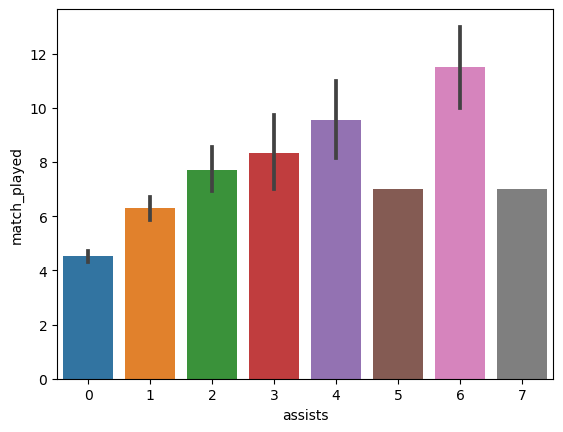

In [26]:
#plotting assists vs matches being played in the tournament
sns.barplot(x='assists', y='match_played', data=df)

<Axes: xlabel='minutes_played', ylabel='assists'>

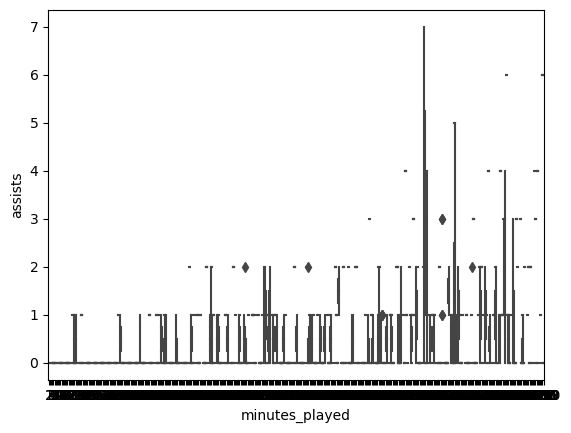

In [31]:
#same visualization different plot 
sns.boxplot(x='minutes_played', y='assists', data=df)

<Axes: xlabel='minutes_played', ylabel='goals'>

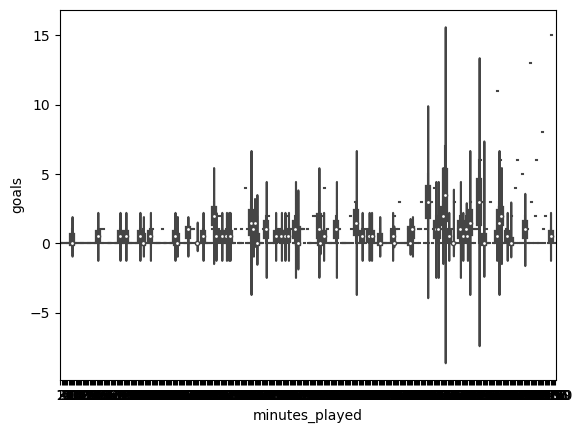

In [33]:
#Let's plot a violin plot that displays the distribution for the goals with respect to the minutes played
sns.violinplot(x='minutes_played', y='goals', data=df)


C:\Users\Manali\AppData\Local\Temp\ipykernel_24584\2932273911.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

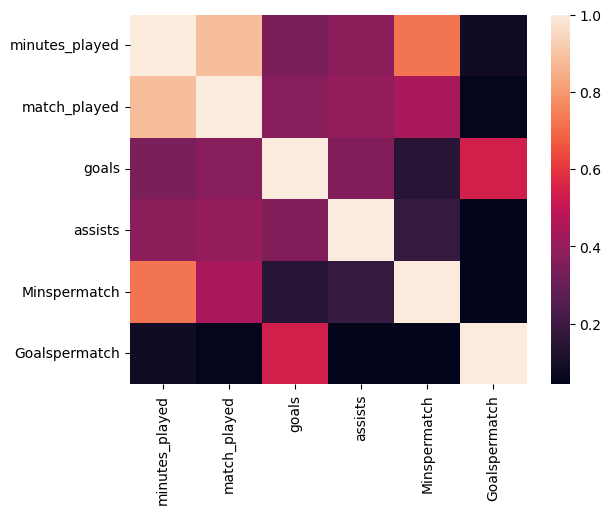

In [34]:
#plotting a heat map for the tourment 
corr = df.corr()
sns.heatmap(corr)

In [38]:
#finding the to 10 assists
top_10_assists = df[['player_name','club','match_played','assists']].nlargest(n=10 , columns = 'assists')
top_10_assists


,player_name,club,match_played,assists
196,Bruno Fernandes,Man. United,7,7
1,Vinícius Júnior,Real Madrid,13,6
76,Sané,Bayern,10,6
138,Antony,Ajax,7,5
3,Modrić,Real Madrid,13,4
31,Alexander-Arnold,Liverpool,9,4
56,Capoue,Villarreal,12,4
81,De Bruyne,Man. City,10,4
99,Mbappé,Paris,8,4
192,Gerard Moreno,Villarreal,7,4


In [40]:
#golas played per match 
top_10_goals_per_match = df[['player_name','Goalspermatch','match_played','goals']].nlargest(n=10 , columns = 'Goalspermatch')
top_10_goals_per_match

,player_name,Goalspermatch,match_played,goals
2,Benzema,1,12,15
66,Lewandowski,1,10,13
102,Haller,1,8,11
184,Nkunku,1,6,7
492,Haaland,1,3,3
710,Ozdoev,1,1,1
0,Courtois,0,13,0
1,Vinícius Júnior,0,13,4
3,Modrić,0,13,0
4,Éder Militão,0,12,0


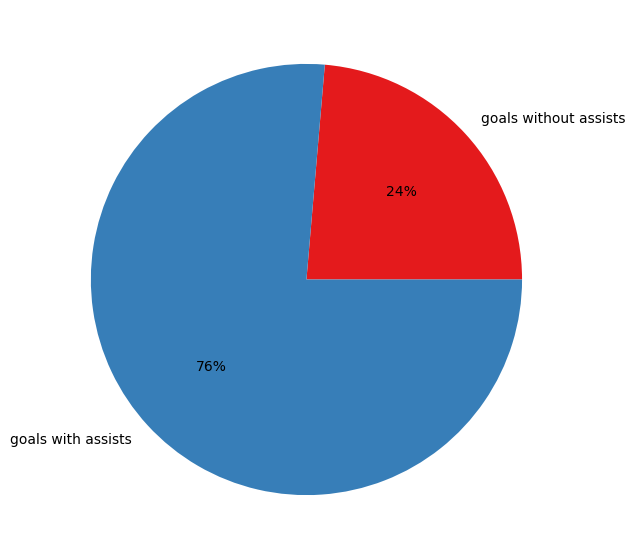

In [46]:
#pie chart  for goals with assist and without assist 

plt.figure(figsize =(10,7))
assists = df['assists'].sum()
data = [Total_goals - assists , assists]
labels = ['goals without assists','goals with assists']
color = sns.color_palette('Set1')
plt.pie(data , labels = labels ,colors = color , autopct = '%.0f%%')
plt.show()